## **Persiapan Data**

In [1]:
# import pandas as pd
# import numpy as np

In [2]:
# dataset = pd.read_csv("dataset/data_labels_ajaib.csv")
# dataset.head(5)

## **Pra-Pengolahan**

### ***Cleaning* & *Case Folding***

In [3]:
# import re

In [4]:
# def clean_text(text):
#   # menghapus http/https (link)
#   text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
#   # menghilangkan tanda baca
#   text = re.sub(r'[^\w\s]', ' ', text)
#   # mengganti karakter html dengan tanda petik
#   text = re.sub('<.*?>', ' ', text)
#   # menghapus spasi berlebihan
#   text = re.sub('[\s]+', ' ', text)
#   # mempertimbangkan huruf dan angka
#   text = re.sub('[^a-zA-Z]', ' ', text)
#   # mengganti line baru dengan spasi
#   text = re.sub("\n", " ", text)
#   # mengubah ke huruf kecil
#   text = text.lower()
#   # memisahkan dan menggabungkan kata
#   text = ' '.join(text.split())
#   return text

In [5]:
# hasil_cleaning = [clean_text(i) for i in dataset["content"]]

### ***Tokenize***

In [6]:
# from nltk.tokenize.regexp import regexp_tokenize
# from nltk.tokenize import RegexpTokenizer

In [7]:
# regexp = RegexpTokenizer(r'\w+|$[0-9]+|\S+')

# hasil_tokenize = []
# for text in hasil_cleaning:
#     tokens = regexp.tokenize(text)
#     hasil_tokenize.append(tokens)

### ***Stopword***

In [8]:
# import nltk
# nltk.download('stopwords')

# from nltk.corpus import stopwords
# stopword = stopwords.words('indonesian')

# stopword = set(stopword)
# stopword.remove("tidak")
# stopword.remove("enggak")


# def stopwords(text):
#   text = [word for word in text if word not in stopword]
#   return text


# hasil_filter = [[token for token in sub_list if token.lower() not in stopword] for sub_list in hasil_tokenize]

### ***Stemming***

In [9]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# import swifter

In [10]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemmed_wrapper(term):
#   return stemmer.stem(term)

# term_dict = {}

# review = hasil_filter
# for doc in review:
#   for term in doc:
#     if term not in term_dict:
#       term_dict[term] = ' '
  
# for term in term_dict:
#   term_dict[term] = stemmed_wrapper(term)

In [11]:
# def get_stemmed_term(doc):
#   return [term_dict[term] for term in doc]

# hasil_stemming = [get_stemmed_term(text) for text in hasil_filter]


In [12]:
# dataset["preprocessing-result"] = hasil_stemming

In [13]:
# pd.DataFrame(dataset).to_csv('hasil_prapengolahan.csv', index=False, header=True)

In [14]:
# dataset.head(5)

## **Definisi Nilai X dan y**

In [1]:
import pandas as pd
import numpy as np
import ast
dataset = pd.read_csv("hasil_prapengolahan.csv")
dataset["processing_result"] = dataset["preprocessing-result"].apply(lambda x: ast.literal_eval(x))
X = dataset["processing_result"].tolist()
y = dataset["labels"]

## ***Split Data***

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train[1])

['diajakin', 'temen', 'pake', 'ajaib', 'kalo', 'investasi', 'emang', 'bagus', 'nih', 'ga', 'ribet', 'udah', 'gtu', 'sama', 'kayak', 'lisa', 'blackpink', 'hehe']


## **Pre-trained Word2Vec** ##

In [1]:
from gensim.models import Word2Vec
w2v_model = Word2Vec.load("model/word2vec/hasil.pretrained.model")
print(w2v_model.min_count)

1


In [5]:
print(w2v_model.vector_size)

400


In [9]:
print(w2v_model.wv.get_vector('fitur'))

[ 7.64224306e-02 -1.53147951e-01  3.87721717e-01 -5.04032254e-01
 -2.09826492e-02  2.73375183e-01 -2.04528034e-01  1.00732490e-01
  1.78517148e-01 -5.13564274e-02  5.58986180e-02  1.82062000e-01
  1.11331046e-01  6.69975132e-02 -1.49948187e-02  1.15357786e-01
  1.86214089e-01  2.65135139e-01  2.54340798e-01  2.01076627e-01
 -1.22842580e-01  1.78124323e-01  1.64949253e-01  1.28245857e-02
 -1.52762281e-02 -4.51471269e-01 -2.50831753e-01 -1.02512799e-02
 -5.37257865e-02  2.66562790e-01  2.35194508e-02 -3.45984966e-01
 -8.16529542e-02 -1.39217839e-01  1.46581352e-01 -2.37459838e-01
 -3.76690067e-02 -3.64739925e-01 -1.79954529e-01 -1.59665287e-01
 -1.01330176e-01 -8.12640637e-02  4.17098030e-02  1.42266974e-01
 -2.02603526e-02  1.08763427e-01  1.14550695e-01  1.15975440e-01
  2.27258235e-01  1.10241674e-01  4.47615057e-01 -9.10782963e-02
  5.08979738e-01 -9.56974644e-03  1.58613980e-01  7.85931349e-02
  1.13074973e-01  1.41221970e-01  5.70179820e-02 -8.59327912e-02
  2.92405307e-01  4.00892

In [20]:
# w2v_model.train(X_train, total_examples=len(X_train), epochs=w2v_model.epochs)
# w2v_model.save("model/word2vec/hasil.pretrained.model")

## **Membuat Matriks Pembobotan Menggunakan Word2Vec** ##

In [21]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [22]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, w2v_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv.key_to_index:
        embedding_matrix[i] = w2v_model.wv[word]

## **Text to Sequence dan  Padding Data**

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [25]:
length_sequences_train = max([len(s) for s in sequences_train])
length_sequences_test = max([len(s) for s in sequences_test])
if(length_sequences_train > length_sequences_test):
    max_length = length_sequences_train
else :
    max_length = length_sequences_test
print(max_length)

60


In [26]:
X_train = pad_sequences(sequences_train, maxlen=max_length)
X_test = pad_sequences(sequences_test, maxlen=max_length)

## **Ubah Label Menggunakan *To Categorical***

In [27]:
from keras.utils import to_categorical

In [28]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

## **Bangun Model LSTM**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from keras.optimizers import Adam

In [30]:
model = Sequential()
model.add(Embedding(embedding_matrix.shape[0], w2v_model.vector_size, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(Dropout(0.2))
model.add(LSTM(32, dropout=0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 400)           880400    
                                                                 
 dropout (Dropout)           (None, 60, 400)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                55424     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 935,923
Trainable params: 55,523
Non-trainable params: 880,400
_________________________________________________________________
None


## **Latih Model LSTM**

Epoch 1/30
89/89 [==============================] - 4s 23ms/step - loss: 0.7772 - accuracy: 0.6437 - val_loss: 0.6132 - val_accuracy: 0.7022
Epoch 2/30
89/89 [==============================] - 1s 15ms/step - loss: 0.5424 - accuracy: 0.7887 - val_loss: 0.4823 - val_accuracy: 0.8315
Epoch 3/30
89/89 [==============================] - 1s 15ms/step - loss: 0.4551 - accuracy: 0.8268 - val_loss: 0.4471 - val_accuracy: 0.8258
Epoch 4/30
89/89 [==============================] - 1s 15ms/step - loss: 0.4026 - accuracy: 0.8549 - val_loss: 0.4179 - val_accuracy: 0.8652
Epoch 5/30
89/89 [==============================] - 1s 15ms/step - loss: 0.4027 - accuracy: 0.8535 - val_loss: 0.3760 - val_accuracy: 0.8764
Epoch 6/30
89/89 [==============================] - 1s 15ms/step - loss: 0.3890 - accuracy: 0.8592 - val_loss: 0.3919 - val_accuracy: 0.8483
Epoch 7/30
89/89 [==============================] - 1s 15ms/step - loss: 0.3584 - accuracy: 0.8718 - val_loss: 0.3760 - val_accuracy: 0.8539
Epoch 8/30
89

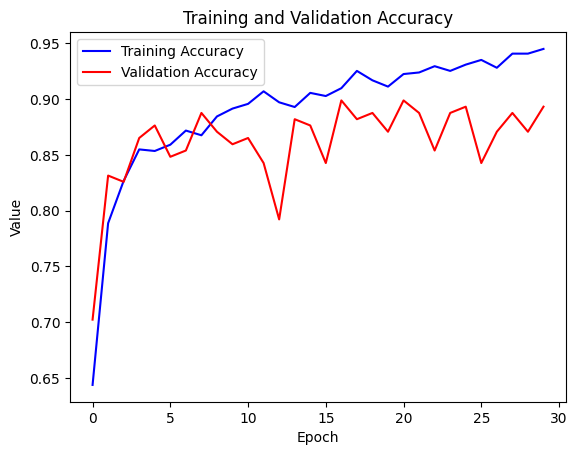

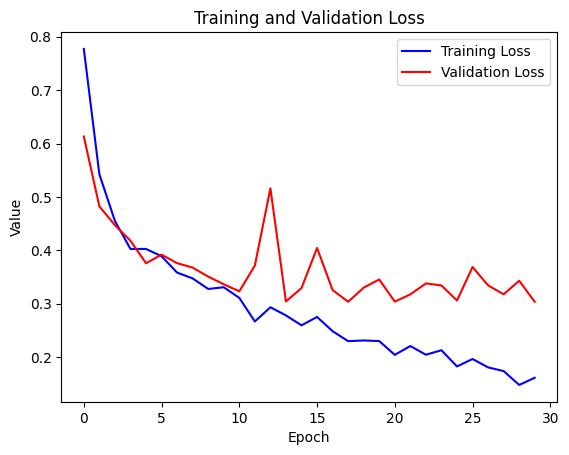

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
history = model.fit(X_train, y_train, batch_size=8, epochs=30, validation_split=0.2)
# akurasi
plt.plot(history.history['accuracy'], 'b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()
# loss
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

## **simpan model**

In [32]:
# save
model.save("model/tuning-ketiga/model-13-2ndtry")

# load model
# trained_model = Sequential.load("model/lstm/model-trained")

INFO:tensorflow:Assets written to: model/tuning-ketiga/model-13-2ndtry\assets


INFO:tensorflow:Assets written to: model/tuning-ketiga/model-13-2ndtry\assets


## **Evaluasi Model**

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

7/7 - 0s - loss: 0.3562 - accuracy: 0.8969 - 98ms/epoch - 14ms/step
Accuracy: 0.8968609571456909
Loss: 0.35616791248321533
7/7 [==============================] - 1s 12ms/step
Confusion matrix:
 [[77  5  1]
 [ 8 62  1]
 [ 3  5 61]]
Accuracy: 0.8968609865470852
Precision: 0.8994323439390705
Recall: 0.8968609865470852
F1-score: 0.8972542549365774
              precision    recall  f1-score   support

           0     0.8750    0.9277    0.9006        83
           1     0.8611    0.8732    0.8671        71
           2     0.9683    0.8841    0.9242        69

    accuracy                         0.8969       223
   macro avg     0.9015    0.8950    0.8973       223
weighted avg     0.8994    0.8969    0.8973       223



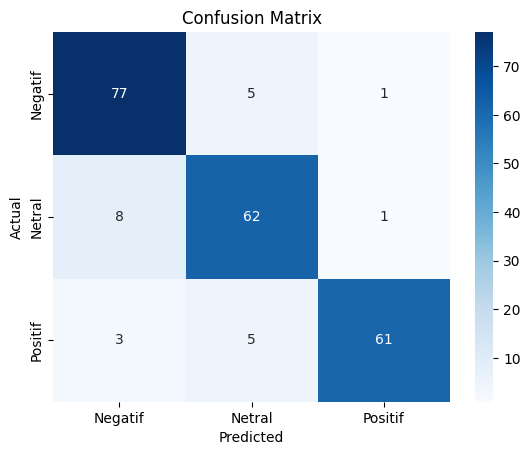

In [34]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy:", acc)
print("Loss:", loss)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted', zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, digits=4))
labels = ['Negatif', 'Netral', 'Positif']
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Prediksi Kalimat** ##

In [35]:
input = ["aplikasinya bagus tapi kadang suka lemot jadi agak ragu untuk berinvestasi di sini"]
seq = tokenizer.texts_to_sequences(input)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(pred)
labels = ['Negatif', 'Netral', 'Positif']
prediksi = labels[np.argmax(pred)]
print(prediksi)
# if(prediksi == "0"):
#     print("kalimat tersebut sentimen negatif")
# elif(prediksi == "1"):
#     print("kalimat tersebut sentimen netral")
# else:
#     print("kalimat tersebut sentimen positif")

1/1 [==============================] - 0s 21ms/step
[[0.02551601 0.9691731  0.00531089]]
Netral
